In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow
import random

# Set random seed for reproducibility
np.random.seed(0)
tensorflow.random.set_seed(0)
random.seed(0)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load and preprocess the data
df = pd.read_excel('/content/drive/MyDrive/seema/Copy of val.xlsx')

In [7]:
df.head()

,Tweet,class,Sub,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,كتبك هي من تسب الآخرين و تصفهم بأقذر الألقاب م...,1,R-HS,NaN,NaN,NaN
1,اخونجي متطرف يعشق الفتنه والخراب لغيره وعشان ك...,1,S-HS,NaN,NaN,NaN
2,احسنت هذا عباله كل واحد عايش في لندن خائن,0,NaN,NaN,NaN,NaN
3,الطيور على أشكالها تقع ، الطغاة يحتفلون بوتين ...,1,P-HS,NaN,NaN,NaN
4,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS,NaN,NaN,ملاحظة


In [8]:
df = df[['Tweet','class','Sub']]

### **Preprocessing**

In [9]:
X = df['Tweet'].astype(str)
y = df['class']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [10]:
# sub_y = df['Sub'].values
# sub_y_train, sub_y_val = sub_y[train_idx], sub_y[val_idx]

### **Tokenization and padding**

In [11]:
max_words = 10000  # Max number of words in tokenizer
max_len = 62  # Max sequence length
embed_dim = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

### **Models**

In [16]:
# Define a list of deep learning models to experiment with
models = [

    ('LSTM', Sequential([
        Embedding(max_words, embed_dim, input_length=max_len),
        LSTM(64,  kernel_initializer='glorot_uniform'),
        Dense(32, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])),
]


### **Train 10 cross validation**

In [17]:
!export TF_DETERMINISTIC_OPS=1

In [18]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Training and evaluating LSTM with 10-fold stratified cross-validation...
Epoch 1/100
56/56 [==============================] - 11s 154ms/step - loss: 0.6895 - accuracy: 0.5618 - val_loss: 0.6870 - val_accuracy: 0.5624
Epoch 2/100
56/56 [==============================] - 7s 117ms/step - loss: 0.6862 - accuracy: 0.5626 - val_loss: 0.6854 - val_accuracy: 0.5624
Epoch 3/100
56/56 [==============================] - 9s 155ms/step - loss: 0.6857 - accuracy: 0.5626 - val_loss: 0.6853 - val_accuracy: 0.5624
Epoch 4/100
56/56 [==============================] - 6s 113ms/step - loss: 0.6862 - accuracy: 0.5626 - val_loss: 0.6852 - val_accuracy: 0.5624
Epoch 5/100
56/56 [==============================] - 9s 167ms/step - loss: 0.6866 - accuracy: 0.5626 - val_loss: 0.6852 - val_accuracy: 0.5624
Epoch 6/100
56/56 [==============================] - 7s 122ms/step - loss: 0.6851 - accuracy: 0.5626 - val_loss: 0.6851 - val_accuracy: 0.5624
Epoch 7/100
56/56 [==============================] - 9s 155ms/step -

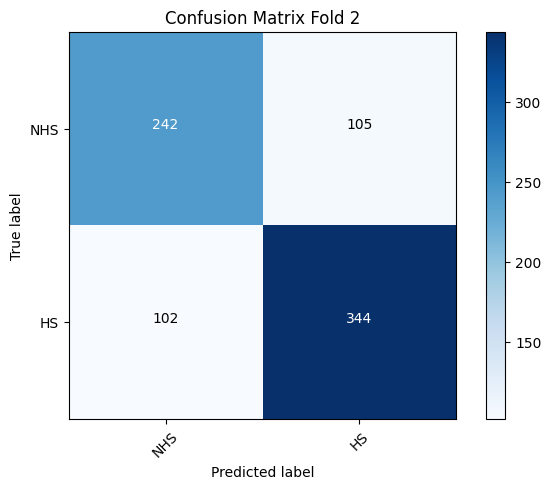

Epoch 1/100
56/56 [==============================] - 14s 191ms/step - loss: 0.3451 - accuracy: 0.8684 - val_loss: 0.2763 - val_accuracy: 0.9004
Epoch 2/100
56/56 [==============================] - 9s 161ms/step - loss: 0.3079 - accuracy: 0.8855 - val_loss: 0.2653 - val_accuracy: 0.9054
Epoch 3/100
56/56 [==============================] - 6s 112ms/step - loss: 0.2679 - accuracy: 0.9027 - val_loss: 0.2513 - val_accuracy: 0.9067
Epoch 4/100
56/56 [==============================] - 9s 155ms/step - loss: 0.2348 - accuracy: 0.9207 - val_loss: 0.2587 - val_accuracy: 0.9016
Epoch 5/100
56/56 [==============================] - 6s 111ms/step - loss: 0.2024 - accuracy: 0.9369 - val_loss: 0.2746 - val_accuracy: 0.8966
Epoch 6/100
56/56 [==============================] - 9s 153ms/step - loss: 0.1715 - accuracy: 0.9478 - val_loss: 0.2744 - val_accuracy: 0.8953
Epoch 7/100
56/56 [==============================] - 6s 108ms/step - loss: 0.1452 - accuracy: 0.9610 - val_loss: 0.3128 - val_accuracy: 0.892

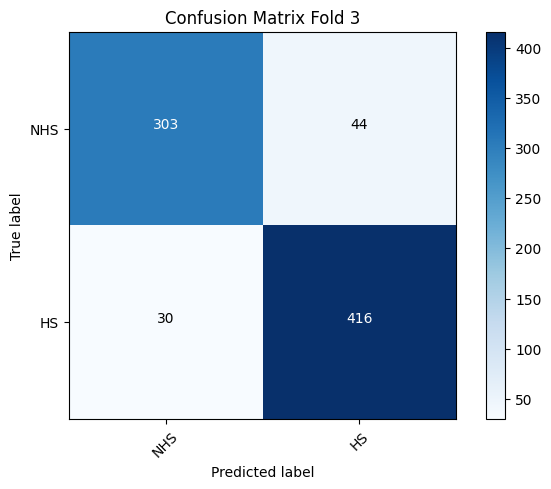

Epoch 1/100
56/56 [==============================] - 17s 260ms/step - loss: 0.2474 - accuracy: 0.9137 - val_loss: 0.2009 - val_accuracy: 0.9369
Epoch 2/100
56/56 [==============================] - 11s 191ms/step - loss: 0.2173 - accuracy: 0.9272 - val_loss: 0.2113 - val_accuracy: 0.9255
Epoch 3/100
56/56 [==============================] - 6s 113ms/step - loss: 0.1900 - accuracy: 0.9381 - val_loss: 0.2173 - val_accuracy: 0.9217
Epoch 4/100
56/56 [==============================] - 8s 141ms/step - loss: 0.1671 - accuracy: 0.9480 - val_loss: 0.2466 - val_accuracy: 0.9091
Epoch 5/100
56/56 [==============================] - 6s 109ms/step - loss: 0.1453 - accuracy: 0.9589 - val_loss: 0.2663 - val_accuracy: 0.9015
Epoch 6/100
56/56 [==============================] - 8s 152ms/step - loss: 0.1185 - accuracy: 0.9686 - val_loss: 0.2849 - val_accuracy: 0.8977
Epoch 7/100
56/56 [==============================] - 6s 109ms/step - loss: 0.0988 - accuracy: 0.9753 - val_loss: 0.3284 - val_accuracy: 0.88

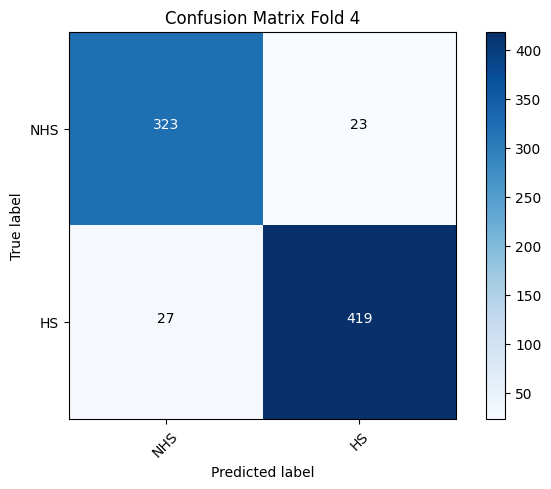

Epoch 1/100
56/56 [==============================] - 13s 170ms/step - loss: 0.2224 - accuracy: 0.9247 - val_loss: 0.1989 - val_accuracy: 0.9331
Epoch 2/100
56/56 [==============================] - 8s 152ms/step - loss: 0.1941 - accuracy: 0.9387 - val_loss: 0.2099 - val_accuracy: 0.9268
Epoch 3/100
56/56 [==============================] - 6s 109ms/step - loss: 0.1707 - accuracy: 0.9474 - val_loss: 0.2190 - val_accuracy: 0.9230
Epoch 4/100
56/56 [==============================] - 8s 151ms/step - loss: 0.1492 - accuracy: 0.9547 - val_loss: 0.2440 - val_accuracy: 0.9167
Epoch 5/100
56/56 [==============================] - 6s 108ms/step - loss: 0.1304 - accuracy: 0.9655 - val_loss: 0.2550 - val_accuracy: 0.9192
Epoch 6/100
56/56 [==============================] - 8s 147ms/step - loss: 0.1049 - accuracy: 0.9741 - val_loss: 0.2851 - val_accuracy: 0.9129
Epoch 7/100
56/56 [==============================] - 6s 111ms/step - loss: 0.0884 - accuracy: 0.9797 - val_loss: 0.3149 - val_accuracy: 0.910

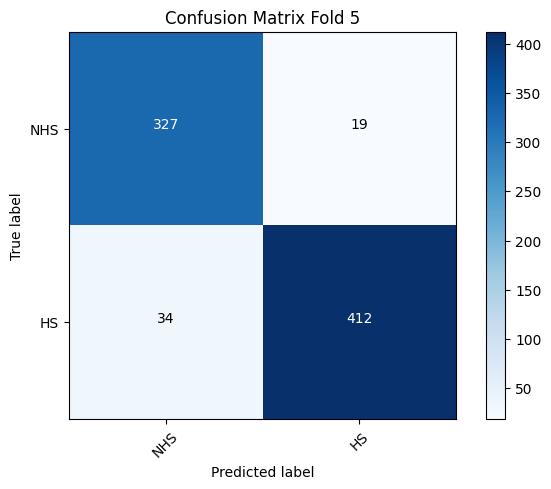

Epoch 1/100
56/56 [==============================] - 13s 188ms/step - loss: 0.2040 - accuracy: 0.9328 - val_loss: 0.1878 - val_accuracy: 0.9369
Epoch 2/100
56/56 [==============================] - 6s 110ms/step - loss: 0.1787 - accuracy: 0.9432 - val_loss: 0.2030 - val_accuracy: 0.9268
Epoch 3/100
56/56 [==============================] - 8s 146ms/step - loss: 0.1577 - accuracy: 0.9518 - val_loss: 0.2114 - val_accuracy: 0.9255
Epoch 4/100
56/56 [==============================] - 6s 107ms/step - loss: 0.1359 - accuracy: 0.9617 - val_loss: 0.2302 - val_accuracy: 0.9205
Epoch 5/100
56/56 [==============================] - 8s 148ms/step - loss: 0.1189 - accuracy: 0.9697 - val_loss: 0.2468 - val_accuracy: 0.9205
Epoch 6/100
56/56 [==============================] - 6s 109ms/step - loss: 0.0968 - accuracy: 0.9773 - val_loss: 0.2951 - val_accuracy: 0.9078
Epoch 7/100
56/56 [==============================] - 8s 135ms/step - loss: 0.0843 - accuracy: 0.9808 - val_loss: 0.3231 - val_accuracy: 0.911

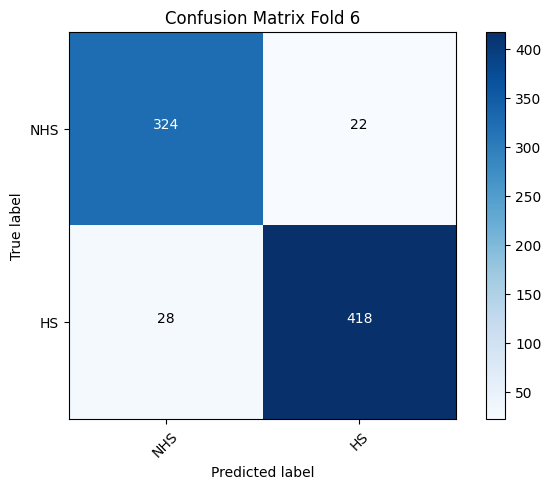

Epoch 1/100
56/56 [==============================] - 14s 191ms/step - loss: 0.1928 - accuracy: 0.9362 - val_loss: 0.1561 - val_accuracy: 0.9545
Epoch 2/100
56/56 [==============================] - 9s 153ms/step - loss: 0.1692 - accuracy: 0.9468 - val_loss: 0.1588 - val_accuracy: 0.9457
Epoch 3/100
56/56 [==============================] - 6s 110ms/step - loss: 0.1509 - accuracy: 0.9547 - val_loss: 0.1682 - val_accuracy: 0.9394
Epoch 4/100
56/56 [==============================] - 9s 157ms/step - loss: 0.1279 - accuracy: 0.9630 - val_loss: 0.1816 - val_accuracy: 0.9318
Epoch 5/100
56/56 [==============================] - 6s 109ms/step - loss: 0.1110 - accuracy: 0.9711 - val_loss: 0.1935 - val_accuracy: 0.9306
Epoch 6/100
56/56 [==============================] - 8s 147ms/step - loss: 0.0929 - accuracy: 0.9773 - val_loss: 0.2249 - val_accuracy: 0.9306
Epoch 7/100
56/56 [==============================] - 6s 110ms/step - loss: 0.0791 - accuracy: 0.9822 - val_loss: 0.2716 - val_accuracy: 0.917

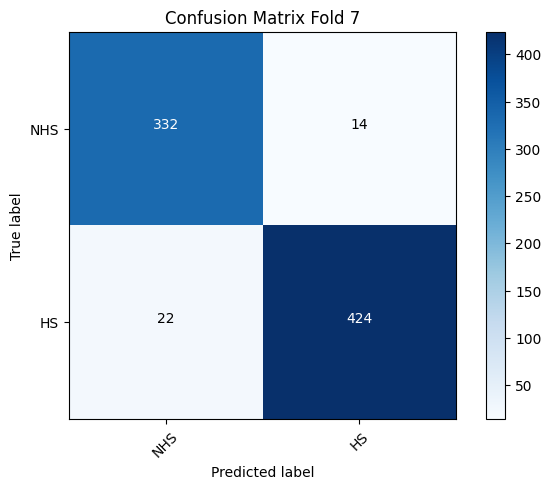

Epoch 1/100
56/56 [==============================] - 12s 177ms/step - loss: 0.1763 - accuracy: 0.9432 - val_loss: 0.1772 - val_accuracy: 0.9318
Epoch 2/100
56/56 [==============================] - 6s 112ms/step - loss: 0.1548 - accuracy: 0.9532 - val_loss: 0.1757 - val_accuracy: 0.9356
Epoch 3/100
56/56 [==============================] - 10s 182ms/step - loss: 0.1406 - accuracy: 0.9592 - val_loss: 0.1983 - val_accuracy: 0.9268
Epoch 4/100
56/56 [==============================] - 7s 117ms/step - loss: 0.1162 - accuracy: 0.9689 - val_loss: 0.2181 - val_accuracy: 0.9141
Epoch 5/100
56/56 [==============================] - 8s 136ms/step - loss: 0.1034 - accuracy: 0.9738 - val_loss: 0.2335 - val_accuracy: 0.9078
Epoch 6/100
56/56 [==============================] - 7s 128ms/step - loss: 0.0856 - accuracy: 0.9787 - val_loss: 0.2857 - val_accuracy: 0.9104
Epoch 7/100
56/56 [==============================] - 7s 125ms/step - loss: 0.0751 - accuracy: 0.9830 - val_loss: 0.3157 - val_accuracy: 0.90

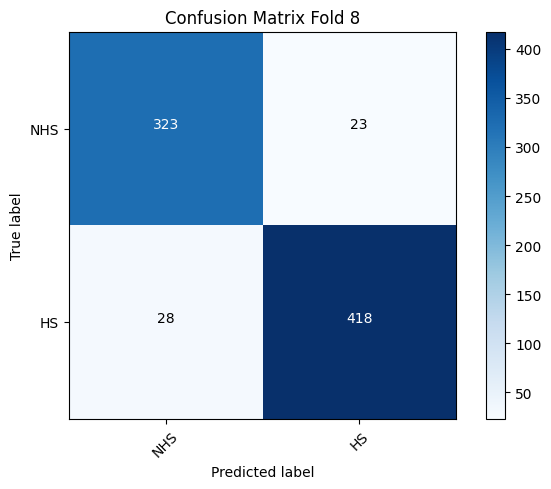

Epoch 1/100
56/56 [==============================] - 14s 203ms/step - loss: 0.1515 - accuracy: 0.9540 - val_loss: 0.1191 - val_accuracy: 0.9634
Epoch 2/100
56/56 [==============================] - 7s 134ms/step - loss: 0.1312 - accuracy: 0.9627 - val_loss: 0.1273 - val_accuracy: 0.9545
Epoch 3/100
56/56 [==============================] - 7s 130ms/step - loss: 0.1231 - accuracy: 0.9659 - val_loss: 0.1429 - val_accuracy: 0.9533
Epoch 4/100
56/56 [==============================] - 7s 125ms/step - loss: 0.1011 - accuracy: 0.9735 - val_loss: 0.1594 - val_accuracy: 0.9432
Epoch 5/100
56/56 [==============================] - 8s 133ms/step - loss: 0.0908 - accuracy: 0.9788 - val_loss: 0.1882 - val_accuracy: 0.9369
Epoch 6/100
56/56 [==============================] - 7s 119ms/step - loss: 0.0748 - accuracy: 0.9832 - val_loss: 0.2044 - val_accuracy: 0.9268
Epoch 7/100
56/56 [==============================] - 8s 143ms/step - loss: 0.0685 - accuracy: 0.9846 - val_loss: 0.2219 - val_accuracy: 0.930

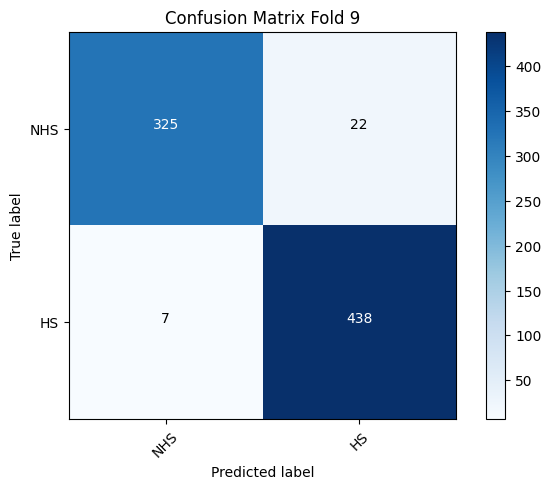

Epoch 1/100
56/56 [==============================] - 14s 209ms/step - loss: 0.1426 - accuracy: 0.9564 - val_loss: 0.1049 - val_accuracy: 0.9735
Epoch 2/100
56/56 [==============================] - 7s 127ms/step - loss: 0.1242 - accuracy: 0.9658 - val_loss: 0.1093 - val_accuracy: 0.9646
Epoch 3/100
56/56 [==============================] - 9s 165ms/step - loss: 0.1100 - accuracy: 0.9710 - val_loss: 0.1250 - val_accuracy: 0.9470
Epoch 4/100
56/56 [==============================] - 9s 161ms/step - loss: 0.0952 - accuracy: 0.9748 - val_loss: 0.1452 - val_accuracy: 0.9470
Epoch 5/100
56/56 [==============================] - 6s 110ms/step - loss: 0.0836 - accuracy: 0.9787 - val_loss: 0.1549 - val_accuracy: 0.9369
Epoch 6/100
56/56 [==============================] - 8s 144ms/step - loss: 0.0706 - accuracy: 0.9827 - val_loss: 0.2175 - val_accuracy: 0.9356
Epoch 7/100
56/56 [==============================] - 6s 113ms/step - loss: 0.0639 - accuracy: 0.9847 - val_loss: 0.2315 - val_accuracy: 0.924

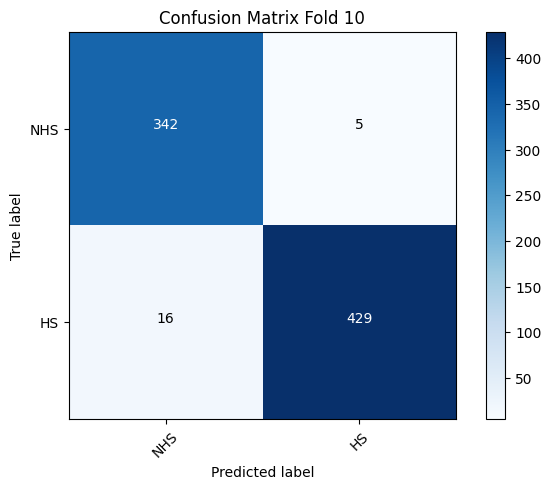

Epoch 1/100
56/56 [==============================] - 12s 171ms/step - loss: 0.1335 - accuracy: 0.9597 - val_loss: 0.0847 - val_accuracy: 0.9785
Epoch 2/100
56/56 [==============================] - 8s 141ms/step - loss: 0.1181 - accuracy: 0.9676 - val_loss: 0.0920 - val_accuracy: 0.9735
Epoch 3/100
56/56 [==============================] - 6s 115ms/step - loss: 0.1033 - accuracy: 0.9735 - val_loss: 0.1023 - val_accuracy: 0.9659
Epoch 4/100
56/56 [==============================] - 8s 147ms/step - loss: 0.0868 - accuracy: 0.9769 - val_loss: 0.1147 - val_accuracy: 0.9634
Epoch 5/100
56/56 [==============================] - 6s 111ms/step - loss: 0.0783 - accuracy: 0.9806 - val_loss: 0.1336 - val_accuracy: 0.9545
Epoch 6/100
56/56 [==============================] - 9s 155ms/step - loss: 0.0653 - accuracy: 0.9851 - val_loss: 0.2075 - val_accuracy: 0.9381
Epoch 7/100
56/56 [==============================] - 6s 111ms/step - loss: 0.0660 - accuracy: 0.9846 - val_loss: 0.1876 - val_accuracy: 0.941

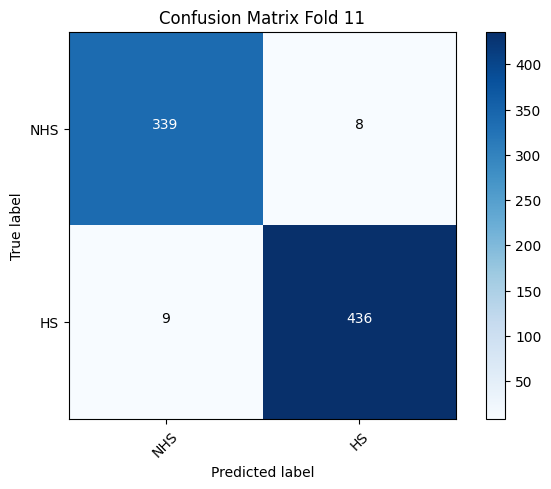

Average metrics for LSTM:
Average Accuracy: 0.9258
Average Precision: 0.9363
Average Recall: 0.9320
Average F1 Score: 0.9341



In [19]:
# Stratified cross-validation with 10 folds
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits)

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'history'])

output_dir = '/content/drive/MyDrive/seema'
# Training and evaluation loop for each model
for name, model in models:
    print(f'Training and evaluating {name} with {n_splits}-fold stratified cross-validation...')
    fold_results = []

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_pad, y), 1):
        X_train, X_val = X_pad[train_idx], X_pad[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        val_subs = df.iloc[val_idx]['Sub'].tolist()
        val_texts = df.iloc[val_idx]['Tweet'].tolist()

        # Compile the model
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

        # Define callbacks (checkpoint and early stopping)
        checkpoint = ModelCheckpoint(f'{output_dir}/checkpoints/{name}_fold{fold_idx}.h5', monitor='val_loss', save_best_only=True, verbose=0)
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)

        # Train the model with callbacks
        history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                            validation_data=(X_val, y_val),
                            callbacks=[checkpoint, early_stopping],
                            verbose=1)

        # Load the best model for prediction
        best_model = load_model(f'{output_dir}/checkpoints/{name}_fold{fold_idx}.h5')

        # Evaluate the model on the validation set
        y_pred = (best_model.predict(X_val) > 0.5).astype(int)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Compute confusion matrix and plot
        cm = confusion_matrix(y_val, y_pred)
        plot_confusion_matrix(cm, classes=['NHS', 'HS'], title=f'Confusion Matrix Fold {fold_idx + 1}')

        # Prepare DataFrame with validation set tweets, true labels, predicted labels, and save
        # val_df = pd.DataFrame({
        #     'Tweet': val_texts,
        #     'True Label': y_val,
        #     'Predicted Label': [x[0] for x in y_pred],
        #     'Sub': val_subs
        # })
        # val_df.to_excel(f'{output_dir}/results/lstm_val_set_with_preds_fold_{fold_idx + 1}.xlsx', index=False)


        # Store the results for this fold
        fold_results.append([name, fold_idx, accuracy, precision, recall, f1, history.history])

    # Append fold results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame(fold_results, columns=results_df.columns)],
                           ignore_index=True)


    # Calculate average metrics across all folds for this model
    avg_accuracy = np.mean(results_df[results_df['Model'] == name]['Accuracy'])
    avg_precision = np.mean(results_df[results_df['Model'] == name]['Precision'])
    avg_recall = np.mean(results_df[results_df['Model'] == name]['Recall'])
    avg_f1 = np.mean(results_df[results_df['Model'] == name]['F1 Score'])

    print(f'Average metrics for {name}:')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print(f'Average F1 Score: {avg_f1:.4f}')
    print('')

# Save results to a CSV file
results_df.to_csv(f'{output_dir}/results/lstm_model_results.csv', index=False)

In [20]:
import pandas as pd
results_df = pd.read_csv('/content/drive/MyDrive/seema/results/lstm_model_results.csv')

In [21]:
results_df.head()

,Model,Fold,Accuracy,Precision,Recall,F1 Score,history
0,LSTM,1,0.738966,0.766147,0.771300,0.768715,"{'loss': [0.689495861530304, 0.686188101768493..."
1,LSTM,2,0.906683,0.904348,0.932735,0.918322,"{'loss': [0.3450621962547302, 0.30792418122291..."
2,LSTM,3,0.936869,0.947964,0.939462,0.943694,"{'loss': [0.2473636120557785, 0.21727718412876..."
3,LSTM,4,0.933081,0.955916,0.923767,0.939567,"{'loss': [0.22237588465213776, 0.1941388994455..."
4,LSTM,5,0.936869,0.950000,0.937220,0.943567,"{'loss': [0.20396193861961365, 0.1787477433681..."


In [22]:
import ast

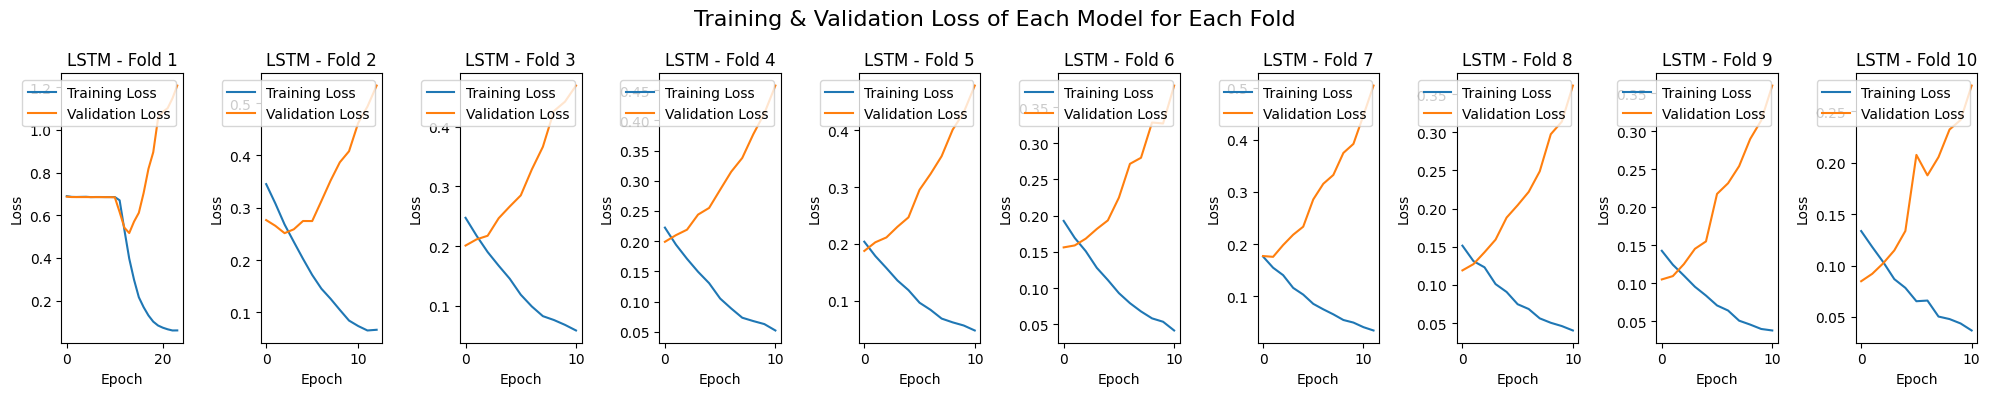

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of models and folds
num_models = len(results_df['Model'].unique())
num_folds = len(results_df['Fold'].unique())

# Create subplots based on the number of models and folds
fig, axes = plt.subplots(num_models, num_folds, figsize=(20, 4*1))
fig.suptitle('Training & Validation Loss of Each Model for Each Fold', fontsize=16)

# Loop through each model and fold to plot the training history
for i, model in enumerate(results_df['Model'].unique()):
    for j, fold in enumerate(results_df['Fold'].unique()):
        # Filter the dataframe for the specific model and fold
        data = results_df[(results_df['Model'] == model) & (results_df['Fold'] == fold)]

        # Extract the history dictionary from the first row
        history = ast.literal_eval(data['history'].values[0])

        # Plot the training loss
        axes[j].plot(history['loss'], label='Training Loss')
        axes[j].plot(history['val_loss'], label='Validation Loss')
        axes[j].set_title(f'{model} - Fold {fold}')
        axes[j].set_xlabel('Epoch')
        axes[j].set_ylabel('Loss')
        axes[j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


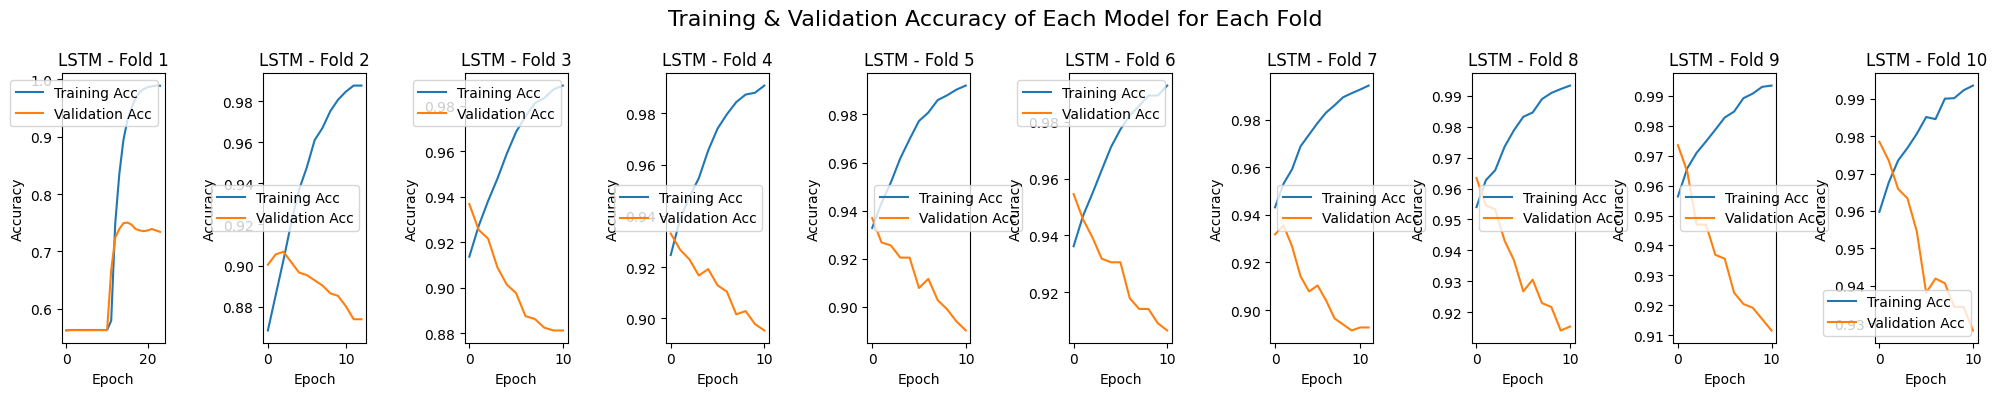

In [24]:
# Create subplots based on the number of models and folds
fig, axes = plt.subplots(num_models, num_folds, figsize=(20, 4*num_models))
fig.suptitle('Training & Validation Accuracy of Each Model for Each Fold', fontsize=16)

# Loop through each model and fold to plot the training history
for i, model in enumerate(results_df['Model'].unique()):
    for j, fold in enumerate(results_df['Fold'].unique()):
        # Filter the dataframe for the specific model and fold
        data = results_df[(results_df['Model'] == model) & (results_df['Fold'] == fold)]

        # Extract the history dictionary from the first row
        history = ast.literal_eval(data['history'].values[0])

        # Plot the training loss
        axes[j].plot(history['accuracy'], label='Training Acc')
        axes[j].plot(history['val_accuracy'], label='Validation Acc')
        axes[j].set_title(f'{model} - Fold {fold}')
        axes[j].set_xlabel('Epoch')
        axes[j].set_ylabel('Accuracy')
        axes[j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
